## [readme] composapy

DataLabs comes pre-installed with composapy, a python package that integrates and binds with the c# project.

#### Bind DLL's.

In [2]:
from composapy.loader import load_init
load_init()

#### Start a session.

```python
$ Session(<username_or_token>: str, <password>: str = None) => Session
```

In [3]:
# your session object requires either your Composable username/password login OR api token.
from composapy.session import Session
session = Session("unittestadmin", "unittestadmin")  # session = Session("<api_token_here>")

#### Bind to a service object...

```python
$ DataFlow(session: Session) => DataFlow
```

In [4]:
# the dataflow service {ApplicationService} object.
from composapy.dataflow.api import DataFlow
dataflow_api = DataFlow(session)

##### ...or, if you want to interface with <a href="https://github.com/pythonnet/pythonnet" target="_blank">pythonnet</a> more closely -- you can find our csharp documentation <a href="https://dev.composable.ai/api/CompAnalytics.Contracts.html" target="_blank">here</a>.
- Comments which contain `{ }` are inserted for literal reference to our csharp documentation.

In [5]:
# don't forget to check out the docstrings with help() for type-hints and additional details.

#### Run a DataFlow

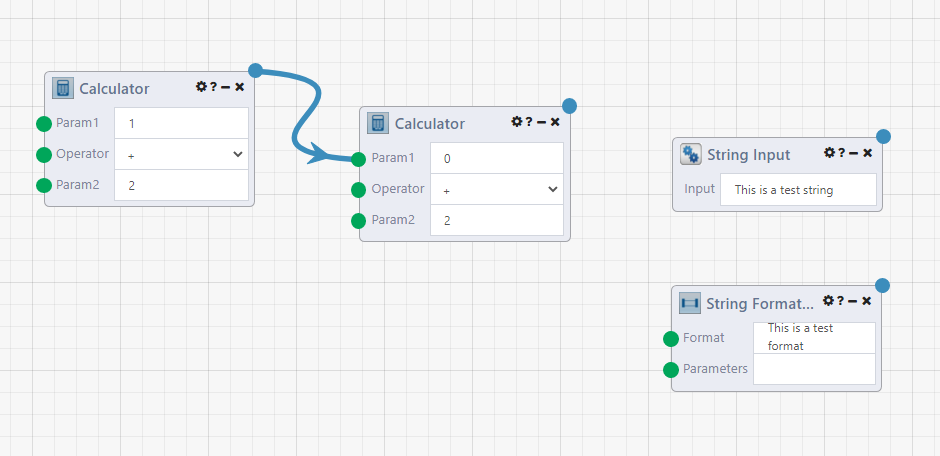

#### Retrieve a DataFlowObject by id.
```python
$ DataFlow.get(id: int) => DataFlowObject
```

In [6]:
dataflow_object = dataflow_api.get(139830)
dict_display_modules = {}                            # iterate over modules and module inputs, creating a dictionary representation
for module in dataflow_object.modules:
    dict_display_modules[module.name] = {_input.name:_input.value_obj for _input in module.inputs}
dict_display_modules

{'Calculator': {'Param1': 0.0, 'Operator': '+', 'Param2': 2.0},
 'String Input': {'Input': 'This is a test string'},
 'String Formatter': {'Format': 'This is a test format', 'Parameters': None}}

#### You can run the dataflow by calling the DataFlowObject's run method...
```python
$ DataFlowObject.run() => DataFlowRun
```

In [25]:
dataflow_run = dataflow_object.run()
for module in dataflow_run.modules:
    print(module.result.value_obj)

3.0
5.0
This is a test string
This is a test format


#### ... or you can run a dataflow directly from the api with an id.
```python
$ DataFlow.run(id: int) => DataFlowRun
```

In [13]:
dataflow_run = dataflow_api.run(139830)
for module in dataflow_run.modules:
    print(module.result.value_obj)

3.0
5.0
This is a test string
This is a test format


## Filtering

#### ModuleSet

```python
$ DataFlowRun.ModuleSet.filter(attr: str) => tuple(Module)
```

In [19]:
calculator_modules = dataflow_object.modules.filter(name="Calculator")
calculator_modules[0].inputs[0].value_obj

1.0

#### InputSet

```python
$ DataFlowRun.Module.InputSet.filter(attr: str) => tuple(Input)
```

In [22]:
calculator_modules[0].inputs.filter(name="Operator")[0].value_obj

'+'

#### ResultSet

```python
$ DataFlowRun.Module.ResultSet.filter(attr: str) => tuple(Result)
```

In [27]:
dataflow_run.modules.filter(name="Calculator")[0].results.filter(name="Result")[0].value_obj

3.0

## Contracts

- The bound contracts `{CompAnalytics.Contracts}` can be accessed from any composapy object thru it's `contract` property.
- Sometimes contract names are a bit different than expected, but they can all be found on Composable's api docs.

```python
$ DataFlowObject.contract: CompAnalytics.Contracts.Application
```

```python
$ DataFlowRun.contract: CompAnalytics.Contracts.ExecutionState
```

```python
$ Module.contract: CompAnalytics.Contracts.Module
```

```python
$ Input.contract: CompAnalytics.Contracts.ModuleInput
```

```python
$ Result.contract: CompAnalytics.Contracts.ModuleOutput
```

## Tables

- For convenience, Result objects with a value_obj of type `{CompAnalytics.Contracts.Tables.Table}` are displayed as a Pandas dataframe

In [31]:
table_run = dataflow_api.get_run(138123)
table_run.modules.first().result

,a,o,e
0,a,o,e
1,e,None,None
2,e,None,None
3,e,None,None
4,e,None,None
5,e,None,None
6,e,None,None
7,e,None,None
8,e,None,None
9,e,None,None
